<h1>Zadaća 4</h1>

<p>Crtanje Fibonaccijeve spirale imalo je vrlo logičan tijek:
    <ul>
        <li> Pisanje funkcije koja račua Fibonaccijev broj </li>
        <li> Crtanje Fibonaccijeve spirale </li>
        <li> Crtanje raznobojnih kvadrata odgovarajućih veličina oko odgovarajućih dijelova spirale </li>
        <li> Upisivanje Fibonaccijevih brojeva u odgovarajuće kvadrate </li>
    </ul>
</p>
<p> Prvi zadatak, nakon <i>importanja</i> odgovarajućih biblioteka, je bio napisati funkciju koja računa Fibonaccijev broj, što dakako nije bio problem. Podsjetimo se samo, Fibonaccijeve brojeve definiramo na sljedeći način: 
    $$F_1 = 1\ ,\quad F_2 = 1\ ,\quad F_n = F_{n-1} + F_{n-2}$$</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.max_open_warning'] = 50
%matplotlib agg

def fibonacci_broj(n):
    if n ==1 or n==2: return 1
    return fibonacci_broj(n-1) + fibonacci_broj(n-2)

In [10]:
from functools import lru_cache as cache

@cache()
def fibonacci_broj(n):
    if n ==1 or n==2: return 1
    return fibonacci_broj(n-1) + fibonacci_broj(n-2)

In [14]:
fibonacci_broj(100)

354224848179261915075

In [18]:
fibonacci_broj.cache_clear()

In [19]:
fibonacci_broj.cache_info()

CacheInfo(hits=0, misses=0, maxsize=128, currsize=0)

Potom sam definirao funkciju koja će računati <i>Fibonaccijevu matricu</i>. Tako će ta matrica za dani $n$ biti dimenzija $F_n \times F_n + F_{n+1}$ (ili obratno), te će se sastojati od $n$ kvadratnih blok-matrica (čiji su elementi jednaki odgovarajućem Fibonaccijevom broju), dimenzija $F_1,\ F_2,\ ...\ \ F_n$ , i to na <i>logičan</i> način; zapravo, funkcija je rekurzivna, te koristeći funkcije `np.hstyack` i `np.vstack` ona blokove slaže spiralno jedne oko drugih.<br><br>
Ovako definirana matrica služit će nam za crtanje raznobojnih kvadrata koristeći `cmap`.

In [2]:
def fibonacci_matrica(n):
    radna = np.zeros((fibonacci_broj(n), fibonacci_broj(n)))
    if (n != 1): radna[:] = fibonacci_broj(n)
    if (n == 1): return radna
    if (n%4 == 2): return np.hstack([radna, fibonacci_matrica(n-1)])
    if (n%4 == 3): return np.vstack([fibonacci_matrica(n-1), radna])
    if (n%4 == 1): return np.vstack([radna, fibonacci_matrica(n-1)])
    if (n%4 == 0): return np.hstack([fibonacci_matrica(n-1), radna])

In [20]:
np.hstack([
    [[2,3],[4,5]],
    [[8,2],[8,1]]
])

array([[2, 3, 8, 2],
       [4, 5, 8, 1]])

Sad nam je ostalo nacrtati samu spiralu (što ide logično: krećemo od $(0,\ 0)$, pa dalje samo pomičemo centar kružnice desno-gore-lijevo-dolje), ispisati brojeve i sve ove dijelove spojiti, te još napraviti male prilagodbe kako bi širina spirale uvijek bila veća od visine.<br><br>
Brojeve ispisujemo pazeći na mjesto ispisa, s time da mjesto ispisa reguliramo na sličan način kao i centar kružnica, a veličinu reguliramo funkcijom <br>$$vel(n) = {(n+2)}^{\frac{3}{2}}$$<br> osim za $n=0$ i $n=1$ čija je veličina uvijek 7 da bi se mogli pročitati. Ovu sam funkciju odabrao isprobavajući razne funkcije, pa sam vidio da ova nekako dobro odgovara. <br><br>
Uza sve ovo, u slučaju kad je $n$ neparan, širina spirale će biti manje nego visina. Da bih to promjenio, odlučio sam samo zamjeniti $x$ i $y$ koordinate i napraviti centralnu simetriju. Međutim, istu stvar treba, dakako, napraviti i za Fibonaccijevu matricu, pa stoga pišem pomoćnu funkciju koja matrici (bilo kojih dimenzija) pridružuje simetričnu matricu (te pritom naravno zamjenjuje broj redaka i stupaca):

In [3]:
def pomocna(m):
    n = np.zeros((m.shape[1], m.shape[0]))
    for i in range (0, m.shape[1]):
        n[i] = np.array([m[k][m.shape[1]-i-1] for k in range (m.shape[0]-1, -1, -1)])
    return n

Na kraju, kad uzmemo u obzir sve dosad navedeno, funkcija koja crta spiralu izgleda ovako:

In [4]:
def fibonacci_spirala(n):
    fig, ax = plt.subplots()
    ax.axis('off')
    centar = [0, 0]
    x1, y1 = 0, 0
    x2, y2 = 1, 1
    natpis_x, natpis_y = 0.1, 0.1
    for k in range (0, n):
        if k%4 == 2:
            y1 -= fibonacci_broj(k+1)
            natpis_y -= fibonacci_broj(k+1)/1.5
            centar[0] += fibonacci_broj(k-1)
        elif k%4 == 3:
            x2 += fibonacci_broj(k+1)
            natpis_x += fibonacci_broj(k+1)/1.5
            centar[1] += fibonacci_broj(k-1)
        elif k%4 == 0 and k != 0:
            y2 += fibonacci_broj(k+1)
            natpis_y += fibonacci_broj(k+1)/1.5
            centar[0] -= fibonacci_broj(k-1)
        elif k%4 == 1:
            x1 -= fibonacci_broj(k+1)
            natpis_x -= fibonacci_broj(k+1) / 1.5
            if k != 1:
                centar[1] -= fibonacci_broj(k-1)
        x = np.linspace(-(k%4)*np.pi/2, (1-(k%4))*np.pi/2)
        if (k==0 or k==1): vel = 7
        else: vel = ((k+3)**(7.5/5))
        if (n%2 == 0): 
            ax.plot(fibonacci_broj(k+1)*np.sin(x) + centar[0], fibonacci_broj(k+1)*np.cos(x) + centar[1], color='gold', lw = 2)
            ax.text(natpis_x, natpis_y, fibonacci_broj(k+1), size = vel/(n/6))
        else: 
            ax.plot(fibonacci_broj(k+1)*np.cos(x) + centar[1], fibonacci_broj(k+1)*np.sin(x) + centar[0], color='gold', lw = 2)
            ax.text(natpis_y, natpis_x, fibonacci_broj(k+1), size = vel/(n/6))
    if (n%2 == 0): ax.imshow(fibonacci_matrica(n), cmap='cool', extent = (x1, x2, y1, y2))
    else: ax.imshow(pomocna(fibonacci_matrica(n)), cmap='cool', extent = (y1, y2, x1, x2))
    return fig

Testirajmo sad ovu funkciju, pozivom za $n = 1,\ 2,\ ...\ ,\ 10$ :

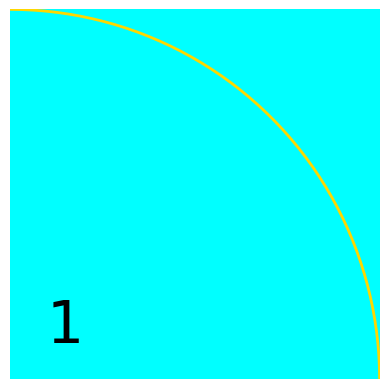

In [5]:
fibonacci_spirala(1)

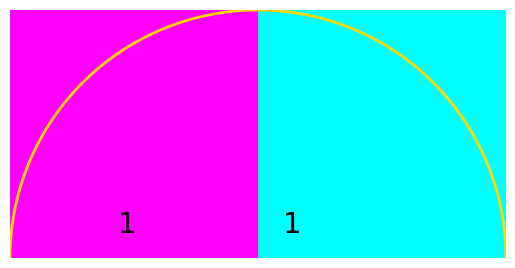

In [6]:
fibonacci_spirala(2)

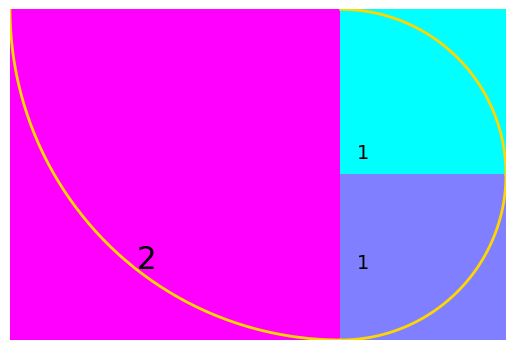

In [7]:
fibonacci_spirala(3)

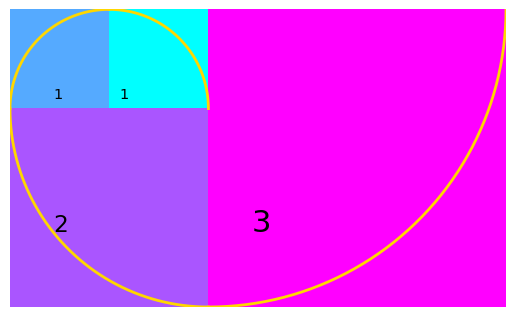

In [8]:
fibonacci_spirala(4)

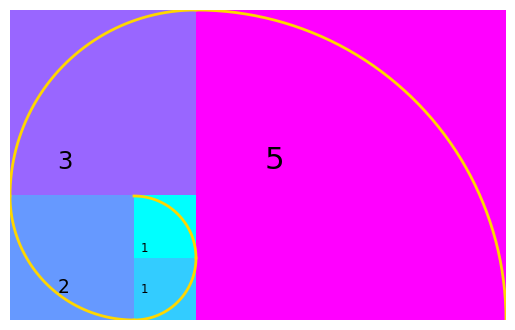

In [9]:
fibonacci_spirala(5)

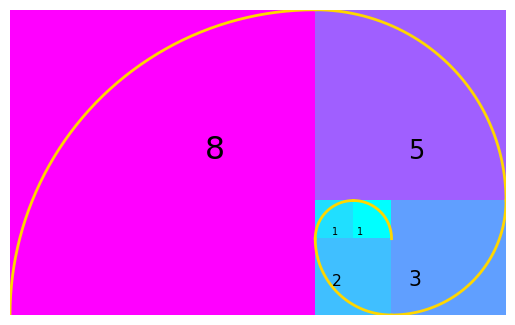

In [10]:
fibonacci_spirala(6)

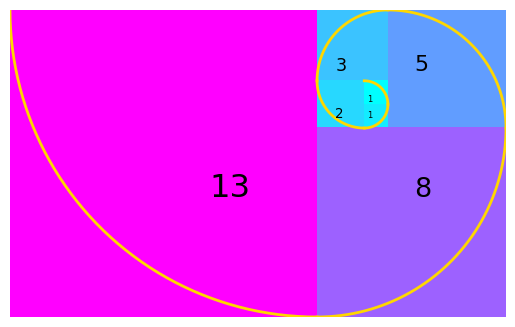

In [11]:
fibonacci_spirala(7)

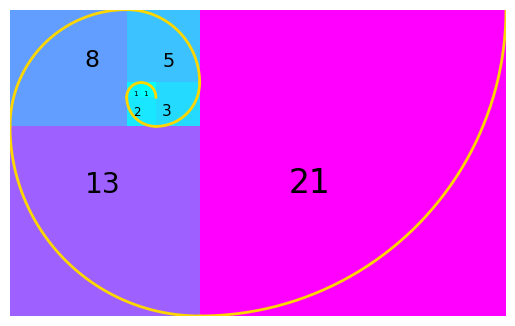

In [12]:
fibonacci_spirala(8)

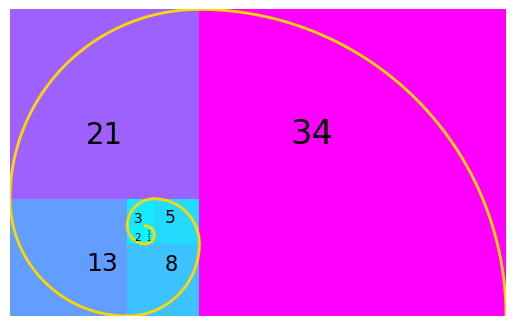

In [13]:
fibonacci_spirala(9)

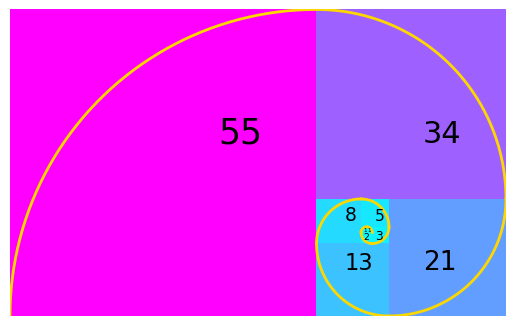

In [14]:
fibonacci_spirala(10)